# 分類範例

In [1]:
import numpy as np
filename='data_weight.txt'
data_heigh=[]
data_weight=[]
label=[]
with open(filename,'r', encoding="utf-8") as f:
    for line in f.readlines():
        line = line.split('\t')
        data_heigh.append(float(line[0]))
        data_weight.append(float(line[1]))
        if '男' in line[2]:
            label.append(1)
        else:
            label.append(0)
data_heigh = np.array(data_heigh)
data_weight = np.array(data_weight)
label=np.array(label)


## 只用身高做平均數分類器

In [5]:
import numpy as np
def classifier_mean(x_male, x_female, x_test):
    d_male = np.abs(x_test-np.mean(x_male))
    d_female = np.abs(x_test-np.mean(x_female))
    if (d_female < d_male):
        return 0, d_female
    else:
        return 1, d_male
pos_female = np.where(label==0)[0]
pos_male = np.where(label==1)[0]
data_male = data_heigh[pos_male]
data_female = data_heigh[pos_female]
result = classifier_mean(data_male, data_female, 650)
print(result)    
    

(1, 474.4533333333334)


將模型寫成簡易模組化

In [7]:
class mean_classifier():
    def ___init__(self):
        self.th=[]
    def fit(self, data_train, label_train):
        mu=[]
        for i in range(np.max(label_train)+1):
            pos = np.where(label_train==i)[0]
            mu.append(np.mean(data_train[pos]))
        self.th = np.array(mu)
    def predict(self,x_test):
        d_value =[]
        for mu in self.th:
            d_value.append(np.abs(x_test-mu))
        d_value = np.array(d_value)
        return np.argmin(d_value), np.min(d_value)

x = data_heigh
y = label 
mc = mean_classifier()
mc.fit(x, y)

In [8]:
for x_test in [180,170,160,150,140]:
    result, value = mc.predict(x_test)
    print('height:{}, predict:{}'.format(x_test, result))

height:180, predict:1
height:170, predict:1
height:160, predict:0
height:150, predict:0
height:140, predict:0


## 多維度平均數分類器

In [11]:
import numpy as np
filename='data_weight.txt'
myArr = np.loadtxt(filename, delimiter=',', encoding="utf-8",dtype='str')
print(myArr)

x,y=[],[]
with open(filename,'r', encoding="utf-8") as f:
    for line in f.readlines():
        line = line.split('\t')
        x.append([float(line[0]), float(line[1])])
        if '男' in line[2]:
            y.append(1)
        else:
            y.append(0)
x = np.array(x)
y = np.array(label)
print(x.shape)

['171.2\t56.6\t男' '158.5\t50\t女' '173\t62\t男' '178\t66\t男' '179\t70\t男'
 '158\t54\t女' '170\t62\t男' '180\t30\t男' '171\t60\t男' '174\t54\t男'
 '168\t58\t男' '182\t103\t男' '177\t83\t男' '170\t65\t男' '158.5\t50\t女'
 '158\t54\t女' '162\t58\t女' '167\t60\t女' '154\t40\t女' '160\t55\t女'
 '152\t45\t女' '180\t90\t男' '175\t80\t男' '185\t101\t男']
(24, 2)


In [15]:
mu=np.mean(x,0)
print(mu)
x_test=[170,50]
(np.dot((x_test-mu),(x_test-mu).transpose()))*0.5

[169.21666667  62.775     ]


81.90711805555554

In [16]:
class mean_classifier():
    def ___init__(self):
        self.th=[]
    def fit(self, data_train, label_train):
        mu=[]
        for i in range(np.max(label_train)+1):
            pos = np.where(label_train==i)[0]
            mu.append(np.mean(data_train[pos,:],0))
        self.th = mu
    def predict(self,x_test):
        d_value =[]
        for mu in self.th:
            d_value.append((np.dot((x_test-mu),(x_test-mu).transpose()))*0.5)
        d_value = np.array(d_value)
        return np.argmin(d_value), np.min(d_value)

mc = mean_classifier()
mc.fit(x, y)

In [17]:
for x_test in [[180,80], [170,70], [160,60], [150,50]]:
    result, value = mc.predict(x_test)
    print('data:{}, predict:{}'.format(x_test, result))

data:[180, 80], predict:1
data:[170, 70], predict:1
data:[160, 60], predict:0
data:[150, 50], predict:0


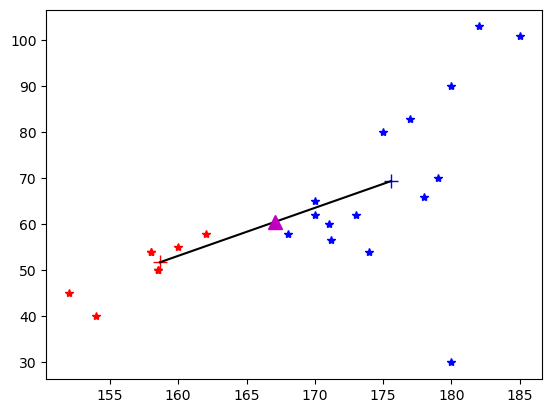

In [18]:
import matplotlib.pyplot as plt
pos_male=np.where(y==1)[0]
pos_female=np.where(y==0)[0]

plt.plot(x[pos_male,0],x[pos_male,1],'b*')
plt.plot(x[pos_female,0],x[pos_female,1],'r*')
plt.plot(np.mean(x[pos_male,0]),np.mean(x[pos_male,1]),'b+', markersize=10)
plt.plot(np.mean(x[pos_female,0]),np.mean(x[pos_female,1]),'r+', markersize=10)
plt.plot([np.mean(x[pos_male,0]), np.mean(x[pos_female,0])],[np.mean(x[pos_male,1]), np.mean(x[pos_female,1])] ,'k-')
plt.plot((np.mean(x[pos_male,0])+np.mean(x[pos_female,0]))/2,(np.mean(x[pos_male,1])+np.mean(x[pos_female,1]))/2 ,'m^', markersize=10)


plt.show()

In [19]:
x_test = [160,100]
result, value = mc.predict(x_test)
print('data:{}, predict:{}'.format(x_test, result))

data:[160, 100], predict:1


# sklearn implementation

In [22]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    
clf_LDA = LinearDiscriminantAnalysis()
clf_LDA.fit(x, y)

clf_QDA = QuadraticDiscriminantAnalysis()
clf_QDA.fit(x, y)

QuadraticDiscriminantAnalysis()

In [23]:
x_test = [[150,50]]
result = clf_LDA.predict(x_test)
print('LDA : data:{}, predict:{}'.format(x_test, result))
result = clf_QDA.predict(x_test)
print('QDA : data:{}, predict:{}'.format(x_test, result))

LDA : data:[[150, 50]], predict:[0]
QDA : data:[[150, 50]], predict:[0]
